### <div align="center">Feature Engineering</div>

##### 8.1: 3 Ways of Doing Feature Engineering
- Feature engineering can be done using two ways: business understanding and statistics.
- 3 Ways of Doing Feature Engineering
  1. Feature Cleaning & Transformation:
     - Improving data quality by cleaning and transforming features to make them suitable for analysis
     - Handle missing data
     - Remove duplicates
     - Treat outliers
     - Scaling
     - Normalization
     - Encoding
  3. Feature Selection: Choosing the most relevant features from the dataset to improve model performance and reduce complexity.
  4. Feature Creation: Generating new features from existing data to enhance the predictive power of the model.

##### 8.2: Feature Selection using Corelation
- Correlation in feature engineering feature selection: Measures the relationship between features to identify and remove redundant or irrelevant ones.
- Scenarios where you should not use correlation for Feature Selection
  1. Non-Linear Relationship
  2. Outliers
  3. Categorical variables
  4. Correlation vs causation

In [1]:
import pandas as pd

df = pd.read_csv("../../data/home_prices.csv")
df.head()

,area_sqr_ft,bedrooms,color,price_lakhs
0,3774,2,Red,216
1,1460,3,Gray,88
2,1894,4,Gray,147
3,1730,2,Blue,84
4,1695,1,Blue,77


In [2]:
df.color.unique()

array(['Red', 'Gray', 'Blue', 'Yellow', 'Green', 'White'], dtype=object)

In [3]:
df_encoded = pd.get_dummies(df, columns=["color"], drop_first=True)
df_encoded.head()

,area_sqr_ft,bedrooms,price_lakhs,color_Gray,color_Green,color_Red,color_White,color_Yellow
0,3774,2,216,False,False,True,False,False
1,1460,3,88,True,False,False,False,False
2,1894,4,147,True,False,False,False,False
3,1730,2,84,False,False,False,False,False
4,1695,1,77,False,False,False,False,False


In [4]:
cm = df_encoded.corr()
cm

,area_sqr_ft,bedrooms,price_lakhs,color_Gray,color_Green,color_Red,color_White,color_Yellow
area_sqr_ft,1.000000,0.185810,0.945365,-0.068944,-0.032012,0.059055,0.063827,-0.037819
bedrooms,0.185810,1.000000,0.439445,0.040882,-0.120207,-0.004177,-0.023676,0.015286
price_lakhs,0.945365,0.439445,1.000000,-0.040565,-0.041959,0.045803,0.051122,-0.046673
color_Gray,-0.068944,0.040882,-0.040565,1.000000,-0.214409,-0.230990,-0.205931,-0.217205
color_Green,-0.032012,-0.120207,-0.041959,-0.214409,1.000000,-0.190117,-0.169493,-0.178771
color_Red,0.059055,-0.004177,0.045803,-0.230990,-0.190117,1.000000,-0.182600,-0.192596
color_White,0.063827,-0.023676,0.051122,-0.205931,-0.169493,-0.182600,1.000000,-0.171703
color_Yellow,-0.037819,0.015286,-0.046673,-0.217205,-0.178771,-0.192596,-0.171703,1.000000


In [5]:
cm_price = abs(cm["price_lakhs"]) 
cm_price

area_sqr_ft     0.945365
bedrooms        0.439445
price_lakhs     1.000000
color_Gray      0.040565
color_Green     0.041959
color_Red       0.045803
color_White     0.051122
color_Yellow    0.046673
Name: price_lakhs, dtype: float64

In [6]:
selected_features = cm_price[cm_price > 0.2].index.drop("price_lakhs")
selected_features

Index(['area_sqr_ft', 'bedrooms'], dtype='object')

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

X = df[selected_features] 
# X = df[["area_sqr_ft", "bedrooms", "color_encoded"]]
y = df['price_lakhs']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("R2:", r2, "MSE:", mse)

R2: 0.9689466488379601 MSE: 76.63332198278805


Dropping unnecessary features (or doing feature selection) helps in saving compute power. In many cases, it helps in increasing model accuracy and overall performance

##### 8.3 & 8.4: Feature Selection using Variance Inflation Factor (VIF)
- Variance Inflation Factor (VIF) measures how much a feature's variance is increased due to multicollinearity, which is when features are highly correlated with each other.
- High VIF means the feature is highly correlated with others, which can cause problems in the model. So we need to drop the column.
- Multicollinearity may not affect the model’s accuracy directly, but model interpretation and the stability of coefficients will be negatively impacted.
- Detect features with high Variance Inflation Factor (VIF) indicating multicollinearity → Eliminate the feature with the highest VIF → Recompute VIF for the remaining features → Repeat the process until all features have acceptable VIF values.

In [11]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

df = pd.read_csv("../../data/salaries_latest.csv")
df.head()

,Years of Experience,Education Level,Age,Location Factor,Salary
0,29,1,49,7,124204
1,27,3,45,4,125948
2,20,4,41,8,116078
3,14,4,37,5,106486
4,20,3,42,7,113297


In [12]:
df.shape

(1000, 5)

In [13]:
# Train a Model With All Features
X = df.drop('Salary', axis='columns')
y = df['Salary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

model_full=LinearRegression()
model_full.fit(X_train, y_train)
model_full.score(X_test, y_test)

0.9525773624816918

In [14]:
X.columns

Index(['Years of Experience', 'Education Level', 'Age', 'Location Factor'], dtype='object')

In [15]:
model_full.intercept_

52608.487605282426

In [16]:
model_full.coef_

array([2113.98280589, 5007.82035443, -123.21488799, 1487.64526717])

In [18]:
print(X_test[:1])
print(y_test[:1])

     Years of Experience  Education Level  Age  Location Factor
841                   38                1   56                9
841    151272
Name: Salary, dtype: int64


In [19]:
model_full.intercept_ + model_full.coef_[0]*38 + model_full.coef_[1]*1 + model_full.coef_[2]*56 + model_full.coef_[3]*9

144436.42826039356

In [20]:
model_full.predict(X_test[:1])

array([144436.42826039])

<Axes: xlabel='Age', ylabel='Salary'>

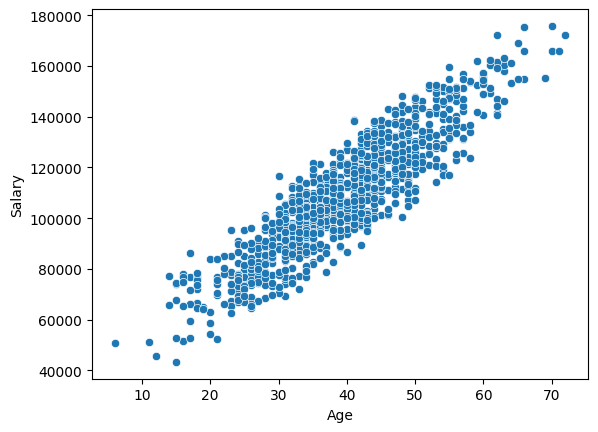

In [21]:
sns.scatterplot(df, x="Age", y="Salary")

##### Compute Variance Inflation Factor (VIF)

In [24]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(data):
    vif_df = pd.DataFrame()
    vif_df['Variable'] = data.columns
    vif_df['VIF'] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]
    return vif_df

In [25]:
X = df.drop('Salary', axis="columns")

calculate_vif(X)

,Variable,VIF
0,Years of Experience,22.342087
1,Education Level,5.472969
2,Age,42.201149
3,Location Factor,4.289467


We will start dropping columns that has VIF > 10, one column at a time

In [26]:
calculate_vif(X.drop(['Age'],axis="columns"))

,Variable,VIF
0,Years of Experience,3.198601
1,Education Level,3.509425
2,Location Factor,3.231181


##### Train a Model With Features that are Filtered Using VIF

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X.drop("Age", axis="columns"), y, test_size=0.2, random_state=10)

model_reduced=LinearRegression()
model_reduced.fit(X_train, y_train)
model_reduced.score(X_test, y_test)

0.9523792255284542

In [28]:
model_reduced.coef_

array([1995.01818661, 5019.90803026, 1495.54971534])